# 1. Ranges as lists

Write a function <b>`range_list(end, start, step)`</b> that gives a list with the numbers that lie in the interval $[start, end)$ with a difference of *step* between consecutive numbers (just as Python's <b><a href="https://docs.python.org/3/library/stdtypes.html#typesseq-range">`range`</a></b> does and with the same defaults it has). For example:

* `range_list(5)` yields `[0, 1, 2, 3, 4]`.
* `range_list(10, start=2, step=2)` gives `[2, 4, 6, 8]`.

In [1]:
# YOUR CODE HERE
def range_list(N,start=0,step=1):
    l=[]
    if step > 0:
        while not start >= N:
            l.append(start)
            arb=start+step
            start=arb
    elif step < 0:
        while start > N:
            l.append(start)
            arb=start+step
            start=arb
    return l[:]

In [2]:
assert(range_list(10) == [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
assert(range_list(10, start=2) == [2, 3, 4, 5, 6, 7, 8, 9])
assert(range_list(10, start=2, step=2) == [2, 4, 6, 8])
assert(range_list(10, start=20, step=-1) == [20, 19, 18, 17, 16, 15, 14, 13, 12, 11])
assert(range_list(10, start=20, step=-2) == [20, 18, 16, 14, 12])

# 2. Sums of ranges

Using the function `range_list`, write another function <b>`sum_range(n)`</b> that computes the sum of the first `n` numbers. If `n` is negative, then the numbers should be generated backwards.

For example:
* `sum_range(4)` should return `10`, as $1+2+3+4 = 10$.
* `sum_range(-3)` should return `-6`, since $(-1)+(-2)+(-3)=-6$.

Make sure that `n` is an integer or something that can be converted to an integer. Otherwise, you should raise a `TypeError`.

<b>Extra points if you do not use any loop nor the `+` operator.</b>

<b>Hint: use Python's built-in <a href="https://docs.python.org/3/library/functions.html#sum">`sum`</a>.</b>

In [3]:
# YOUR CODE HERE
def sum_range(N):
    x = range_list(int(N),start=0,step=1)
    if int(N) > 0:
        y= sum(x,int(N))
        return y
    elif int(N) < 0:
        x = range_list(int(N),start=0,step=-1)
        myneglist= [-i for i in x]
        y=sum(myneglist,int(-N))
        return -y
    else:
        y=N
        return y

In [4]:
assert(sum_range(10) == 55)   # positive
assert(sum_range(-10) == -55)   # negative
assert(sum_range(0) == 0)    # zero
assert(sum_range(1) == 1)    # 1
assert(sum_range(-1) == -1)    # 1

# 3. Sums of ranges (cont.)

It turns out that there is no need to explicitly generate the numbers up to $n$, so that we need not call `range_list`. A well-known mathematical result is the following:
$$\sum_{k=1}^n k = \frac{n \times (n+1)}{2}.$$

So for example $\sum_{k=1}^4 k = (4 \times 5) / 2 = 10$, without actually summing $1 + 2 + 3 + 4$. Given this, implement another function <b>`sum_range_formula(n)`</b> that uses the formula above and with the same requirements `sum_range` has (i.e., it should work with negative numbers and it should raise a `TypeError` if `n` cannot be interpreted as an integer).

In [5]:
# YOUR CODE HERE
def sum_range_formula(n):
    if int(n) > 0:
        original = int(n)
        subsequent = int(n)+1
        multiplication = original*subsequent
        division = int(multiplication/2)
        return int(division)
    elif int(n) < 0:
        original = int(n)
        subsequent = int(n)-1
        multiplication = original*subsequent
        division = -(multiplication/2)
        return int(division)
    else:
        return n

In [6]:
for val in (10, -10, 0, 1, -1, 10.0, '10'):
    assert(sum_range_formula(val) == sum_range(val))    # result is the same as for sum_range

# 4. Triangular numbers

Now, if we call `sum_range_formula` for increasing values of `n`, we obtain the so-called <a href="https://en.wikipedia.org/wiki/Triangular_number">triangular numbers</a> $T_n$:

$$
T_0 = 0 = (0 \times 1)/2 = 0, \\
T_1 = 0 + 1 = (1 \times 2)/2 = 1, \\
T_2 = 0 + 1 + 2 = (2 \times 3)/2 = 3, \\
T_3 = 0 + 1 + 2 + 3 = (3 \times 4)/2 = 6, \\
T_4 = 0 + 1 + 2 + 3 + 4 = (4 \times 5)/2 = 10, \\
T_5 = 0 + 1 + 2 + 3 + 4 + 5 = (5 \times 6)/2 = 15, \\
T_6 = 0 + 1 + 2 + 3 + 4 + 5 + 6 = (6 \times 7)/2 = 21, \\
\cdots
$$

Graphically this is very easy to understand, and it becomes crystal clear why they are called "triangular":

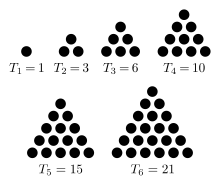

With this in mind, write a function <b>`triangular_numbers(n, all_previous)`</b> that computes the following:
* If `all_previous=False` (the default), it just returns $T_n$.
* If `all_previous=True`, it should return the list with all triangular numbers up to the requested one, i.e. $[T_0, T_1, \ldots, T_n]$.

For example:
* `triangular_numbers(4)` and `triangular_numbers(4, all_previous=False)` should return `10`. 
* `triangular_numbers(4, all_previous=True)` should give you `[0, 1, 3, 6, 10]`.

This time not only does `n` need to be an integer, but it should be non-negative as well (if it is negative, you should raise a `ValueError`). Make sure `all_previous` is valid too.

<b>Extra points if for the case `all_previous=True` you use a single loop and do not call `sum_range_formula` (nor `sum_range`!) to calculate each $T_k, 0 \leq k \leq n$ in the list.</b>

<b>Hint: observe the difference between a triangular number $T_k$ and the next triangular number $T_{k+1}$.</b>

In [7]:
# YOUR CODE HERE
def triangular_numbers(n, all_previous=False):
    
    if all_previous == False:
        return sum_range_formula(n)
    l=[]
    if all_previous == True:
        for i in range(0,int(n)+1):
            l.append(sum_range_formula(i))
        return l

In [8]:
assert(triangular_numbers(0) == 0)   # zero
assert(triangular_numbers(0, all_previous=True) == [0])   # zero in list form
assert(triangular_numbers(4, all_previous=False) == 10)   # normal case
assert(triangular_numbers(4, all_previous=True) == [0, 1, 3, 6, 10])   # list case
assert(triangular_numbers('4') == 10)   # can be converted to int
assert(triangular_numbers(4.0, all_previous=True) == [0, 1, 3, 6, 10])   # same

# 5. Tetrahedral numbers

We have just seen that triangular numbers $T_n$ can be interpreted as the total number of dots that compose an equilateral triangle whose edges have $n$ dots. We can add a 3rd dimension and build a triangular pyramid of balls. Take a look at this one:

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d5/Pyramid_of_35_spheres_animation.gif"></img>

How many balls do we need? Well, we need $T_5 + T_4 + T_3 + T_2 + T_1 = 15 + 10 + 6 + 3 + 1 = 35$ balls, as each storey of the pyramid is composed of a triangle with decreasing $n$ edge balls, starting with $n=5$. This logic gives rise to the so-called <a href="https://en.wikipedia.org/wiki/Tetrahedral_number">tetrahedral numbers</a> (a "tetrahedron" is a pyramid composed of equilateral triangles). Denoting them as $\Delta_n$ we have that:

$$\Delta_n = \sum_{k=0}^n T_k = \sum_{k=0}^n \frac{k \times (k+1)}{2}.$$

Write a function <b>`tetrahedral_numbers(n, all_previous)`</b> that has the same internal logic as `triangular_numbers`. For example:

* `tetrahedral_numbers(5)` and `tetrahedral_numbers(5, all_previous=False)` should return `35`. 
* `tetrahedral_numbers(5, all_previous=True)` should give you `[0, 1, 4, 10, 20, 35]`.

<b>Extra points if for the case `all_previous=False` you do not call `triangular_numbers` (nor use any loop or `sum`!).</b>

<b>Hint: there is a direct formula to obtain $\Delta_n$ (just as there is one to obtain $T_n$). You can infer it by using the fact that $$\sum_{k=1}^n k^2 = \frac{n \times (n+1) \times (2n+1)}{6}.$$</b>

In [9]:
# YOUR CODE HERE
def tetrahedral_numbers(n,all_previous=False):
    if all_previous == False:
        return sum(triangular_numbers(n,all_previous=True))
    elif all_previous == True:
        l=[]
        for i in range (0,int(n)+1):
            l.append(i)
            a=[]
        total=0
        for i in range(int(n)+1):
            aux=(i*(i+1))/2
            total=total+aux
            l[i]=int(total)
            
        return l

In [10]:
assert(tetrahedral_numbers(0) == 0)   # zero
assert(tetrahedral_numbers(0, all_previous=True) == [0])   # zero in list form
assert(tetrahedral_numbers(5, all_previous=False) == 35)   # normal case
assert(tetrahedral_numbers(5, all_previous=True) == [0, 1, 4, 10, 20, 35])   # list case
assert(tetrahedral_numbers('5') == 35)   # can be converted to int
assert(tetrahedral_numbers(5.0, all_previous=True) == [0, 1, 4, 10, 20, 35])   # same

# 6. Binomial coefficients

Let us move on to another kind of integers. The <a href="https://en.wikipedia.org/wiki/Binomial_coefficient">binomial coefficients</a> are defined as the numbers:
$${n \choose k} = \frac{n!}{k! \times (n-k)!}, \quad 0 \leq k \leq n,$$

where $x!$ denotes the factorial of $x$ and, because $0! = 1$, the limit cases are 
$${n \choose 0} = {n \choose n} = 1.$$

Implement a function <b>`binomial(n, k)`</b> that computes the above formula. As before, make sure that `n` and `k` are integers and not out of limits. Otherwise, you should raise `TypeError` and `ValueError`, respectively.

<b>Extra points if you do something more efficient than `factorial(n) / (factorial(k)*factorial(n-k))`.</b> In any case, remember that `factorial` is available in the <a href="https://docs.python.org/3/library/math.html">`math`</a> library.

<b>Hint: observe that due to symmetry ${n \choose k} = {n \choose n-k}$ and that some of the terms in the denominator cancel out some of the terms in the numerator.</b>

In [11]:
# YOUR CODE HERE
def binomial(n,k):
    if (type(n) != int) or (type(k) != int):
        raise TypeError('N and K must be integers')    # no return needed
    if n < 0 or k <0:   # now N for sure is an int
        raise ValueError('N and K cannot be negative!')
    if n < k:
        raise ValueError('K must be smaller than N')
    a=1
    for i in range(1,n+1):
        a=a*i
    b=1
    for i in range(1,k+1):
        b=b*i
    c=n-k
    d=1
    for i in range(1,c+1):
        d=d*i
    return int((a)/((b)*(d)))

In [12]:
assert(binomial(0, 0) == 1)   # (0 0)
assert(binomial(1, 0) == 1)   # (1 0)
assert(binomial(1, 1) == 1)   # (1 1)
assert([binomial(2, i) for i in range(3)] == [1, 2, 1])     # (2 0), (2 1), (2 2)
assert([binomial(3, i) for i in range(4)] == [1, 3, 3, 1])    # (3 0), (3 1), (3 2), (3 3)
assert([binomial(4, i) for i in range(5)] == [1, 4, 6, 4, 1])    # (4 0), (4 1), (4 2), (4 3), (4 4)

# 7. Pascal's triangles

The binomial coefficients can be arranged in the so-called <a href="https://en.wikipedia.org/wiki/Pascal%27s_triangle">Pascal's triangle</a>, whose $n$-th row is formed with the numbers ${n \choose k}, 0 \leq k \leq n.$ Its first rows are thus the following:

$$
1 \\
1 \; 1 \\
1 \; 2 \; 1 \\
1 \; 3 \; 3 \; 1 \\
1 \; 4 \; 6 \; 4 \; 1 \\
1 \; 5 \; 10 \; 10 \; 5 \; 1 \\
1 \; 6 \; 15 \; 20 \; 15 \; 6 \; 1 \\
1 \; 7 \; 21 \; 35 \; 35 \; 21 \; 7 \; 1 \\
$$

Observe that in this triangle each number can be computed as the sum of the two numbers that are on top of it. For instance, in the 4-th row the 6 in the middle is the sum of the two 3s on top of it. This is due to the recurrence:

$${n \choose k} = {n-1 \choose k-1} + {n-1 \choose k}.$$

Graphically:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0d/PascalTriangleAnimated2.gif/220px-PascalTriangleAnimated2.gif"></img>

With this in mind, code a function <b>`pascal_triangle(row)`</b> that generates the triangle until the specified row (inclusive). Because there is no triangular native structure in Python, we will adopt the following convention:
* The triangle is in dictionary form.
* Each row is stored in `key:value` format, with `key` the row index (starting in 0).
* `value` is the list with the `key`-th row of the triangle.

For example, `pascal_triangle(4)` should return the following dictionary:
`{0: [1], 1: [1, 1], 2: [1, 2, 1], 3: [1, 3, 3, 1], 4: [1, 4, 6, 4, 1]}`.

<b>Extra points if you are able to:
* Take advantage of symmetry (for example, in row 5 once you have computed `[1, 5, 10]` the rest of the row is its reflection `[10, 5, 1]`, so there is no need to calculate this second half).
* Use the recurrence above, so that you need not call `binomial`.</b>

In [13]:
# YOUR CODE HERE
def pascal_triangle(row):
    d={}
    for j in range(int(row)+1):
        d[j]=[]
        for i in range(0,j+1):
            aux=d[j]
            aux.append(binomial(j,i))
    return d

In [14]:
assert(pascal_triangle(0) == {0: [1]})
assert(pascal_triangle('1') == {0: [1], 1: [1, 1]})
assert(pascal_triangle(2.0) == {0: [1], 1: [1, 1], 2: [1, 2, 1]})
assert(pascal_triangle(4) == {0: [1], 
                              1: [1, 1], 
                              2: [1, 2, 1], 
                              3: [1, 3, 3, 1], 
                              4: [1, 4, 6, 4, 1]})

# 8. Pascal's triangles (cont.)

A Pascal's triangle has many interesting properties. Let us now use some of them to check whether a given dictionary in the format above obeys these properties:

* Row properties:
    1. The sum of the elements of the $n$-th row is $2^n$, i.e. $\sum_{k=0}^n {n \choose k} = 2^n$. For example, in row $n=3$ we have $1 + 3 + 3 + 1 = 8 = 2^3$.
    2. The sum of the squared elements of the $n$-th row is the middle element of row $2n$, i.e. $\sum_{k=0}^n {n \choose k}^2 = {2n \choose n}$. For example, in row $n=3$ we have $1^2 + 3^2 + 3^2 + 1^2 = 20$, which is the middle element of row $2n = 6$.
    3. The number of odd terms in the $n$-th row is $2^x$, where $x$ is the number of 1s in the binary representation of $n$. For example, in row 5 the number of odd terms is 4 (terms 1, 5, 5 and 1), and $4 = 2^2$, so $x=2$, which matches with the fact that the binary representation of 5 ('101') has two 1s.
    4. For rows with an odd number of terms, if you start with the middle element, subtract the two numbers next to it, then add the following two numbers, then substract the following two, and so on till you get to the outer diagonals, you will always obtain 0. For example, in row 4:
    $$6 - (4+4) + (1+1) = 0.$$
    And for row 6:
    $$20 - (15+15) + (6+6) - (1+1) = 0.$$
    
* Diagonal properties:
    1. The outer diagonals are all made of 1s.
    2. The next diagonals are made of successive numbers: $1, 2, 3, 4, 5, 6, 7, \ldots$
    3. The next diagonals are made of successive triangular numbers $T_k$: $1, 3, 6, 10, 15, 21, \ldots$
    4. The next diagonals are made of successive tetrahedral numbers $\Delta_k$: $1, 4, 10, 20, 35, \ldots$
    
To conclude this assignment, let us code three functions to carry out these checks:

* <b>`check_pascal_rows(triangle)`</b> returns (`True`, `None`) if the rows of the triangle passed (in dictionary format) comply with the 4 row properties enumerated. Otherwise, it should return a tuple `(False, num)`, where `num` is the property number that failed (starting in 1). Properties should be checked in the same order enumerated above.
* <b>`check_pascal_diagonals(triangle)`</b> does the same, but with diagonal properties instead of row ones.
* <b>`check_pascal_triangle(triangle)`</b> returns whether the given triangle complies with row and diagonal properties ((`True`, `None`) if it does) or not. In case it does not, it should return a tuple `(False, (reason, num))`, where `num` is the same as above and `reason` is `'rows'` or `'diagonals'` depending on which one failed. 

Be careful with limits! For example, if you have a small triangle with just the first 2 rows (i.e., ``{0: [1], 1: [1, 1]}``) there are no 3rd or 4th diagonals, but it is a perfectly valid Pascal triangle, so checks should be `True`.

Be also careful to check inside `check_pascal_triangle` that the dictionary passed is actually a triangle before calling `check_pascal_rows` and `check_pascal_diagonals`! If not, you should return `(False, ('shape', None))` to indicate this.

<b>Hint: for the 3rd row property you can use the built-in <a href="https://docs.python.org/3/library/functions.html#bin">`bin`</a>, which gives the binary representation of a number in string form. You may also find the built-ins <a href="https://docs.python.org/3/library/functions.html#all">`all`</a> and <a href="">`any`</a> to be useful, when checking whether some condition holds or does not hold for several elements at once.</b>

In [15]:
# YOUR CODE HERE
def check_pascal_rows(triangle):
    import math as m
    for row,values in triangle.items():
        #Row_Rule_1
        if pow(2,row) != sum(values):
            return (False,1)
        #Row_Rule_3
        if row>0:
            odd_terms=sum([1 if x%2==1 else 0 for x in values])
            Number_of_ones=int(m.log(odd_terms,2))
            binary_ones=bin(row)[2:].count('1')
            if Number_of_ones != binary_ones:
                return(False,3)
    return(True,None)

def check_pascal_diagonals(triangle):
    for row,values in triangle.items():
        #Diag_Rule_1
        if values[0] != 1 or values[-1] != 1:
            return (False,1)
        #Diag_Rule_2
        if row>0:
            if values[1] != row or values[-2] != row:
                return (False,2)
    return (True,None)

def check_pascal_triangle(triangle):
    for row,values in triangle.items():
        if len(values) != row + 1:
            return(False,("shape", None))
    row_test=check_pascal_rows(triangle)
    if row_test[0]==False:
        return (False,('rows',row_test[1]))
    diag_test=check_pascal_diagonals(triangle)
    if diag_test[0]==False:
        return (False,('diagonals',diag_test[1]))
    return (True,None)

In [16]:
for n in range(10):
    aux = pascal_triangle(n)   # valid Pascal triangle
    assert(check_pascal_rows(aux) == (True, None))      # so valid rows
    assert(check_pascal_diagonals(aux) == (True, None))      # and valid diagonals
    assert(check_pascal_triangle(aux) == (True, None))    # so valid triangle overall
assert(check_pascal_triangle({}) == (True, None))     # empty triangle is valid too
wrong_triangle = {0: [2]}     # wrong because 0th row should be [1]
assert(check_pascal_rows(wrong_triangle) == (False, 1))     # row property 1 fails
assert(check_pascal_diagonals(wrong_triangle) == (False, 1))     # diagonal property 1 fails
assert(check_pascal_triangle(wrong_triangle) == (False, ('rows', 1)))    # rows checked before diagonals
wrong_triangle = {0: [1], 1: [1, 1], 2: [1, 3, 1]}     # wrong because 2nd row should be [1, 2, 1]
assert(check_pascal_rows(wrong_triangle) == (False, 1))     # row property 1 fails
assert(check_pascal_diagonals(wrong_triangle) == (False, 2))     # diagonal property 2 fails, 1 is ok
assert(check_pascal_triangle(wrong_triangle) == (False, ('rows', 1)))    # rows checked before diagonals
wrong_triangle = {0: [1], 1: [1, 1], 2: [1, 2, 1], 3: [1, 6, 1]}   # wrong because 3rd row should be [1, 3, 3, 1]
assert(check_pascal_rows(wrong_triangle) == (False, 3))    # row property 3 fails, 1 and 2 ok
assert(check_pascal_diagonals(wrong_triangle) == (False, 2))   # diagonal property 2 fails, 1 is ok
assert(check_pascal_triangle(wrong_triangle) == (False, ('shape', None)))    # not a triangle
wrong_triangle = {0: [1], 1: [1, 1], 2: [1, 2, 1], 
                  3: [1, 3, 3, 1], 4: [1, 3.5, 6, 4.5, 1]}   # wrong because 4th row should be [1, 4, 6, 4, 1]
assert(check_pascal_rows(wrong_triangle) == (True, None))    # row properties hold
assert(check_pascal_diagonals(wrong_triangle) == (False, 2))   # diagonal property 2 fails, 1 is ok
assert(check_pascal_triangle(wrong_triangle) == (False, ('diagonals', 2)))    # rows pass, but diagonals don't

# 9. Final boss

Congratulations if you arrived here! As a final brain teaser, let me tell you the following: every Pascal's triangle must satisfy all 8 properties checked above, but a triangle that satisfies them is not necessarily a Pascal's triangle.

So, given this fact, can you come up with <b>a triangle that passes all checks (i.e., for which `pascal_triangle` returns `(True, None)`), but actually is not a Pascal triangle</b>? If so, assign it to a variable `FAKE_TRIANGLE` below:

In [17]:
# YOUR CODE HERE
a=pascal_triangle(14)
b=a[13][4]
c=a[13][5]
a[13][4]=c
a[13][5]=b
FAKE_TRIANGLE=a

In [18]:
assert(check_pascal_rows(FAKE_TRIANGLE) == (True, None))    # rows ok
assert(check_pascal_diagonals(FAKE_TRIANGLE) == (True, None))    # diagonals ok
assert(check_pascal_triangle(FAKE_TRIANGLE) == (True, None))   # full triangle apparently ok
assert(FAKE_TRIANGLE != pascal_triangle(len(FAKE_TRIANGLE)-1))   # but different from actual Pascal's triangle